## Practice 3. 국가 군집화

데이터 셋: https://www.kaggle.com/datasets/ashydv/country-socioeconomic-data  
참고 자료: https://www.kaggle.com/code/ashydv/country-clustering-hierarchical-clustering-pca

각 국가별 사회적, 경제적 지표들이 들어있는 데이터 셋이 주어집니다.

- country: 국가 이름
- child_mort: 1000명당 5세 미만 아동 사망률
- exports: 상품 및 서비스 수출. 총 GDP 대비 백분율로 표시됨
- health: 총 건강 지출. 총 GDP 대비 백분율로 표시됨
- imports: 상품 및 서비스 수입. 총 GDP 대비 백분율로 표시됨
- Income: 개인 당 순소득
- Inflation: 총 GDP의 연간 성장률 측정
- life_expec: 현재 사망률 패턴이 지속된다고 할 때, 신생아의 평균 수명
- total_fer: 현재의 연령별 출산율이 유지된다고 할 때, 각 여성당 출산될 아이의 수
- gdpp: 1인당 GDP. 총 GDP를 총 인구로 나눈 값
- region_1: 지역 구분 1
- region_2: 지역 구분 2
- continent: 대륙

이 데이터를 활용하여 국가들을 군집화 하고 싶습니다. 계층적 군집 분석을 다양하게 활용해보세요. 대륙은 다르지만 같은 군집으로 분류되는 국가들은 어떤 특징을 가지고 있는지 분석해보세요. 

In [45]:
import seaborn as sns
from matplotlib import pyplot as plt

In [221]:
import pandas as pd

df = pd.read_csv("./data/country.csv", index_col="country")
df_1 = pd.read_csv("./data/country.csv", index_col="country")
df_2 = pd.read_csv("./data/country.csv", index_col="country")
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region_1,region_2,continent
country,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Southern Asia,NaN,Asia
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Southern Europe,NaN,Europe
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Northern Africa,NaN,Africa
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Middle Africa,Sub-Saharan Africa,Africa
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Caribbean,Latin America and the Caribbean,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Melanesia,NaN,Oceania
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,South America,Latin America and the Caribbean,South America
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,South-eastern Asia,NaN,Asia


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
plt.figure(figsize=(15,13))

plt.subplot(3,3,1)
sns.histplot(data = df, x = 'child_mort',kde=True)

plt.subplot(3,3,2)
sns.histplot(data = df, x = 'exports',kde=True)

plt.subplot(3,3,3)
sns.histplot(data = df, x = 'health',kde=True)

plt.subplot(3,3,4)
sns.histplot(data = df, x = 'imports',kde=True)

plt.subplot(3,3,5)
sns.histplot(data = df, x = 'income',kde=True)

plt.subplot(3,3,6)
sns.histplot(data = df, x = 'inflation',kde=True)

plt.subplot(3,3,7)
sns.histplot(data = df, x = 'life_expec',kde=True)

plt.subplot(3,3,8)
sns.histplot(data = df, x = 'total_fer',kde=True)

plt.subplot(3,3,9)
sns.histplot(data = df, x = 'gdpp',kde=True)


In [ ]:
plt.figure(figsize=(15,13))

plt.subplot(3,3,1)
sns.boxplot(data = df, x = 'child_mort')

plt.subplot(3,3,2)
sns.boxplot(data = df, x = 'exports')

plt.subplot(3,3,3)
sns.boxplot(data = df, x = 'health')

plt.subplot(3,3,4)
sns.boxplot(data = df, x = 'imports')

plt.subplot(3,3,5)
sns.boxplot(data = df, x = 'income')

plt.subplot(3,3,6)
sns.boxplot(data = df, x = 'inflation')

plt.subplot(3,3,7)
sns.boxplot(data = df, x = 'life_expec')

plt.subplot(3,3,8)
sns.boxplot(data = df, x = 'total_fer')

plt.subplot(3,3,9)
sns.boxplot(data = df, x = 'gdpp')


In [ ]:
df['region_1'].value_counts()

In [ ]:
region_counts = (df['region_1'].value_counts())

plt.figure(figsize=(15,5))
plt.bar(region_counts.index,region_counts)
_=plt.xticks(rotation=45)
plt.text(0,16,16,ha='center')
plt.text(1,16,16,ha='center')
plt.text(2,13,13,ha='center')
plt.text(3,12,12,ha='center')
plt.text(4,12,12,ha='center')
plt.text(5,11,11,ha='center')
plt.text(6,10,10,ha='center')
plt.text(7,10,10,ha='center')
plt.text(8,9,9,ha='center')
plt.text(9,8,8,ha='center')
plt.text(10,8,8,ha='center')
plt.text(11,7,7,ha='center')
plt.text(12,6,6,ha='center')
plt.text(13,5,5,ha='center')
plt.text(14,5,5,ha='center')
plt.text(15,4,4,ha='center')
plt.text(16,4,4,ha='center')
plt.text(17,3,3,ha='center')
plt.text(18,2,2,ha='center')
plt.text(19,2,2,ha='center')
plt.text(20,2,2,ha='center')
plt.text(21,2,2,ha='center')

In [233]:
df['trade'] = (df['exports'] / df['imports'] * 100).astype(int)

In [291]:
df[['trade']]

,trade
country,
Afghanistan,22
Albania,57
Algeria,122
Angola,145
Antigua and Barbuda,77
...,...
Vanuatu,88
Venezuela,161
Vietnam,89


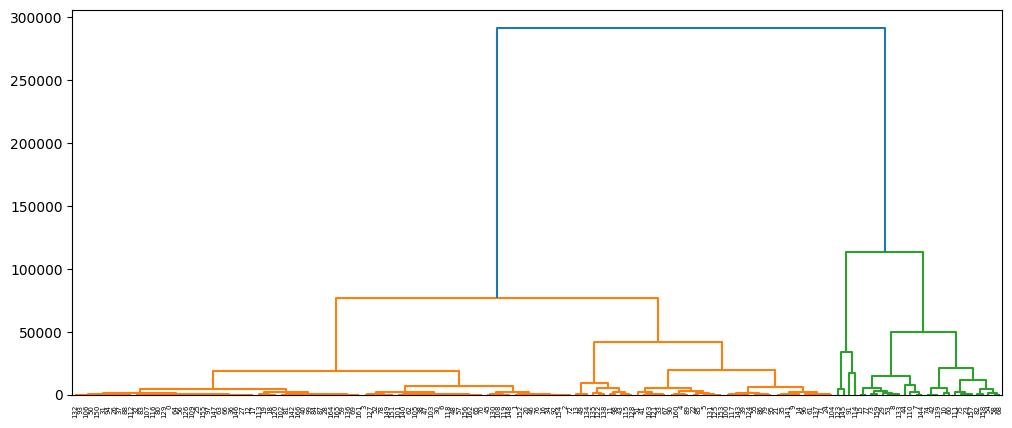

In [416]:
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy as hc

x = df[['trade','gdpp']]

plt.figure(figsize=(12,5))
_=hc.dendrogram(hc.linkage(x,method='ward'))

  0%|          | 0/9 [00:00<?, ?it/s]

<BarContainer object of 9 artists>

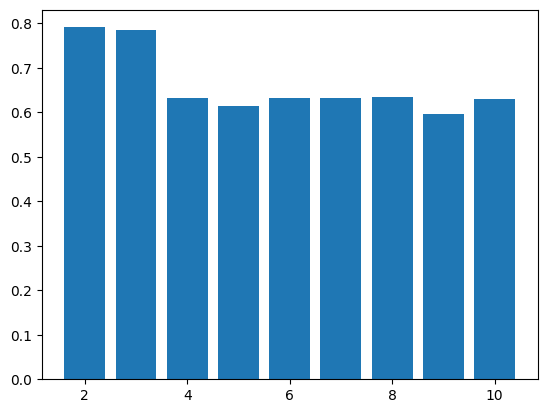

In [417]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from tqdm.notebook import tqdm


silhouette_scores = []
for i in tqdm(range(2,11)):
    silhouette_scores.append(
        silhouette_score(x,AgglomerativeClustering(n_clusters = i).fit_predict(x))
    )
    
plt.bar(range(2,11),silhouette_scores)

In [418]:
model = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
df['label'] = model.fit_predict(x)

c:\Users\xzv22\.conda\envs\mulcam_3_9\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [419]:
len(df.index)

167

In [420]:
df.groupby(['label'])['trade'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,30.0,118.233333,44.304342,71.0,94.25,109.0,119.75,261.0
1,137.0,86.043796,42.494441,7.0,61.00,82.0,106.00,305.0


In [421]:
df.groupby(['label'])['gdpp'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,30.0,47053.333333,17529.418295,26900.0,35425.0,44450.0,49900.0,105000.0
1,137.0,5499.372263,5661.356510,231.0,1170.0,3450.0,8080.0,23400.0


<Axes: >

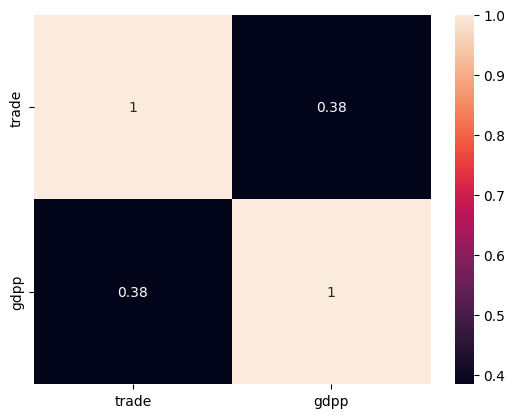

In [422]:
sns.heatmap(df[['trade','gdpp']].corr(),annot=True)

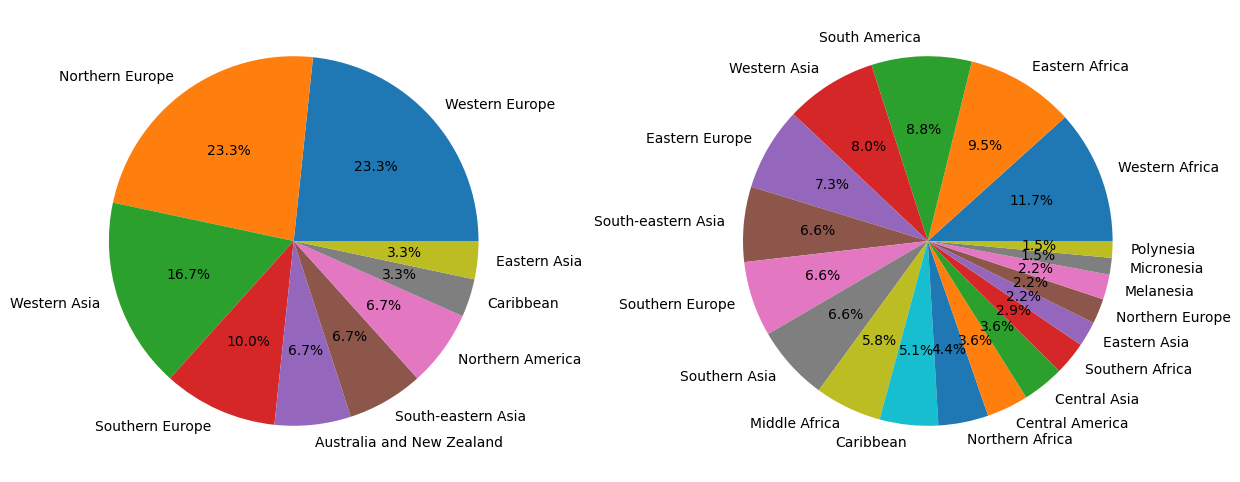

In [389]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.pie(df[df['label']==0]['region_1'].value_counts(),
        labels = df[df['label']==0]['region_1'].value_counts().index,
        autopct = '%1.1f%%')

plt.subplot(1,2,2)
_=plt.pie(df[df['label']==1]['region_1'].value_counts(),
        labels = df[df['label']==1]['region_1'].value_counts().index,
        autopct = '%1.1f%%')

Text(0.5, 1.0, 'total_fer by Label')

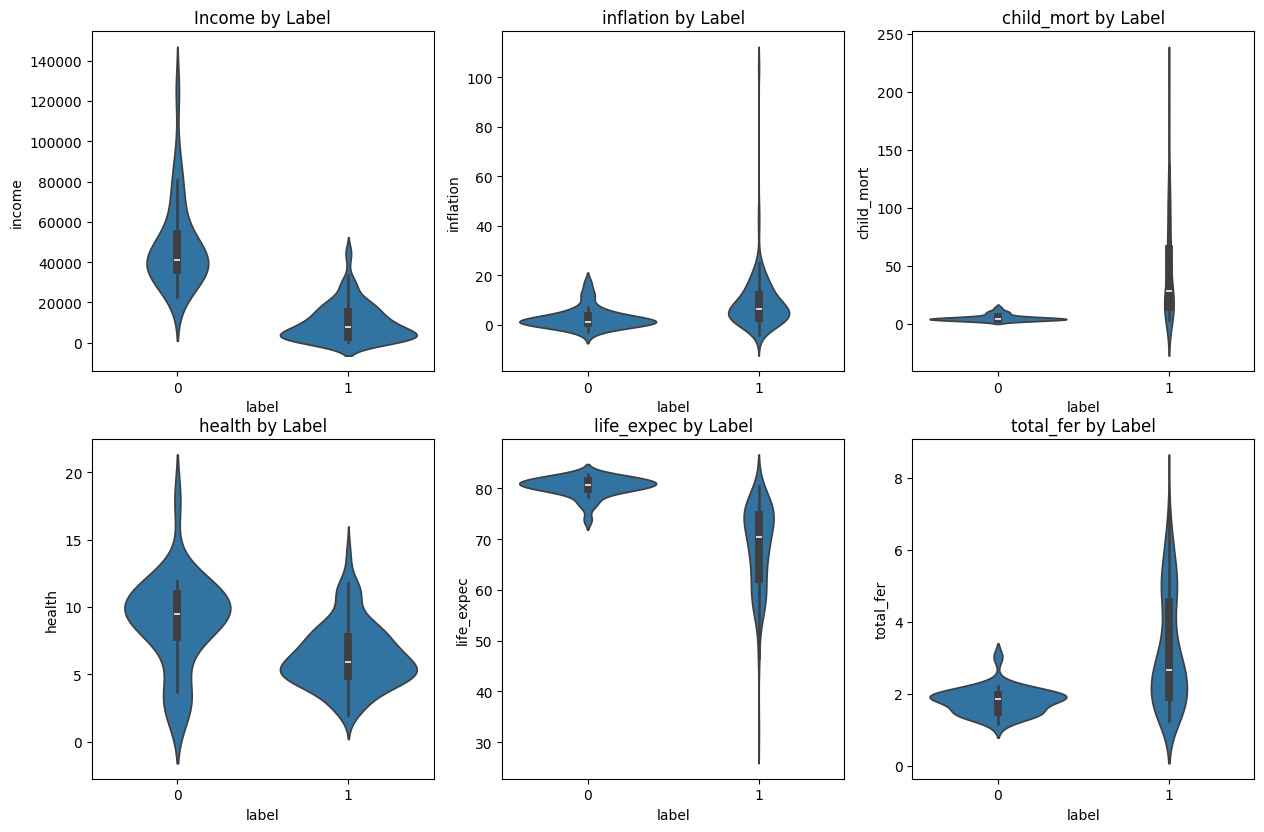

In [366]:
plt.figure(figsize=(15,15))


plt.subplot(3,3,1)
sns.violinplot(
    data = df,
    x = 'label',
    y = 'income'
)
plt.title('Income by Label')

plt.subplot(3,3,2)
sns.violinplot(
    data = df,
    x = 'label',
    y = 'inflation'
)
plt.title('inflation by Label')

plt.subplot(3,3,3)
sns.violinplot(
    data = df,
    x = 'label',
    y = 'child_mort'
)
plt.title('child_mort by Label')

plt.subplot(3,3,4)
sns.violinplot(
    data = df,
    x = 'label',
    y = 'health'
)
plt.title('health by Label')

plt.subplot(3,3,5)
sns.violinplot(
    data = df,
    x = 'label',
    y = 'life_expec'
)
plt.title('life_expec by Label')

plt.subplot(3,3,6)
sns.violinplot(
    data = df,
    x = 'label',
    y = 'total_fer'
)
plt.title('total_fer by Label')


# plt.subplot(3,3,3)
# sns.violinplot(
#     data = df,
#     x = 'label',
#     y = 'gdpp'
# )


# plt.subplot(3,3,8)
# sns.violinplot(
#     data = df,
#     x = 'label',
#     y = 'gdpp'
# )

# plt.subplot(3,3,9)
# sns.barplot(
#     data = df,
#     x = 'label',
#     y = 'continent'
# )

===========================================================================================================

In [414]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region_1,region_2,continent,trade,label
country,,,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Southern Asia,NaN,Asia,22,0
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Southern Europe,NaN,Europe,57,1
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Northern Africa,NaN,Africa,122,1
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Middle Africa,Sub-Saharan Africa,Africa,145,0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Caribbean,Latin America and the Caribbean,North America,77,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Melanesia,NaN,Oceania,88,1
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,South America,Latin America and the Caribbean,South America,161,1
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,South-eastern Asia,NaN,Asia,89,1


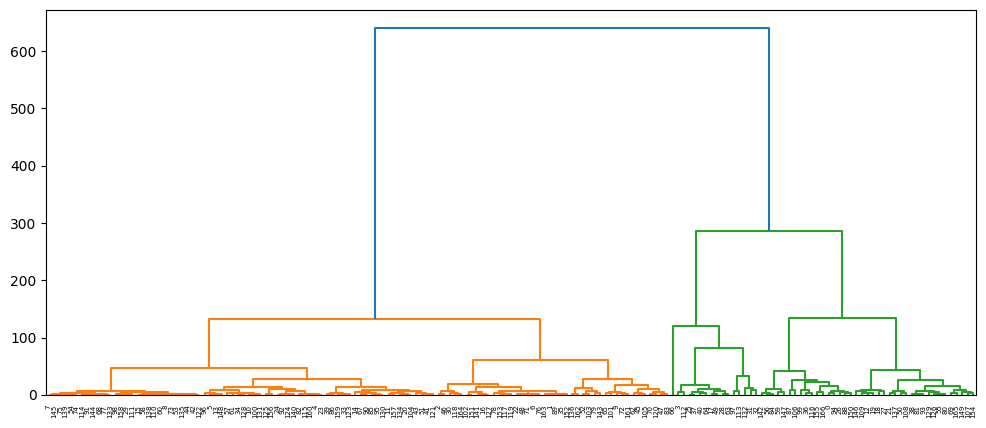

In [394]:
x = df[['child_mort','life_expec']]

plt.figure(figsize=(12,5))
_=hc.dendrogram(hc.linkage(x,method='ward'))

  0%|          | 0/9 [00:00<?, ?it/s]

<BarContainer object of 9 artists>

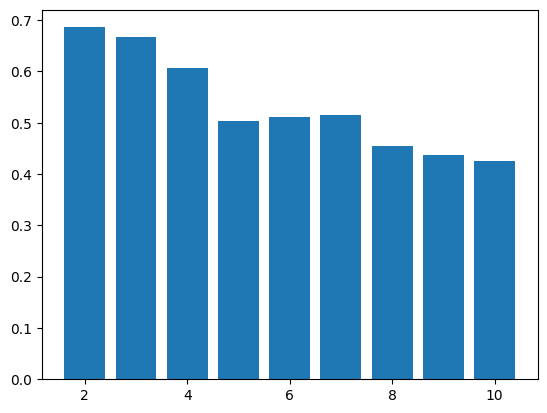

In [395]:
silhouette_scores = []
for i in tqdm(range(2,11)):
    silhouette_scores.append(
        silhouette_score(x,AgglomerativeClustering(n_clusters = i).fit_predict(x))
    )
    
plt.bar(range(2,11),silhouette_scores)

In [396]:
model = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
df['label'] = model.fit_predict(x)

c:\Users\xzv22\.conda\envs\mulcam_3_9\lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [399]:
df.groupby(['label'])['child_mort'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,55.0,87.272727,33.869950,42.7,62.2,81.00,110.0,208.0
1,112.0,14.206250,10.006271,2.6,5.5,11.35,19.4,40.0


In [402]:
df.groupby(['label'])['life_expec'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,55.0,60.610909,6.942933,32.1,57.2,60.70,65.700,72.1
1,112.0,75.439286,4.664498,61.7,73.1,76.05,79.575,82.8


<Axes: >

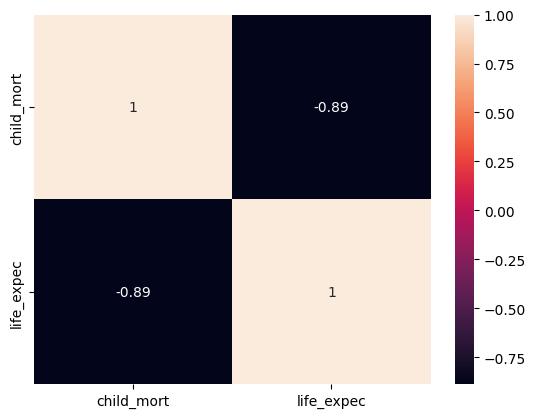

In [408]:
sns.heatmap(df[['child_mort','life_expec']].corr(),annot=True)

Text(0.5, 1.0, 'Label 1 (low mortality, high expectancy)')

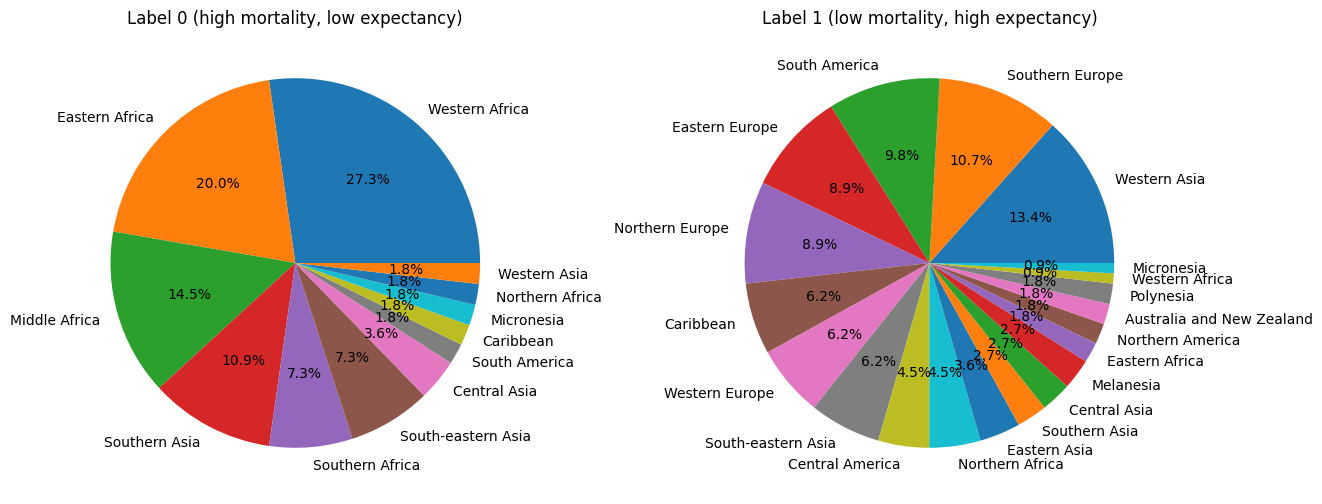

In [413]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.pie(df[df['label']==0]['region_1'].value_counts(),
        labels = df[df['label']==0]['region_1'].value_counts().index,
        autopct = '%1.1f%%')
plt.title('Label 0 (high mortality, low expectancy)')

plt.subplot(1,2,2)
_=plt.pie(df[df['label']==1]['region_1'].value_counts(),
        labels = df[df['label']==1]['region_1'].value_counts().index,
        autopct = '%1.1f%%')
plt.title('Label 1 (low mortality, high expectancy)')

Text(0.5, 1.0, 'Trade by Label')

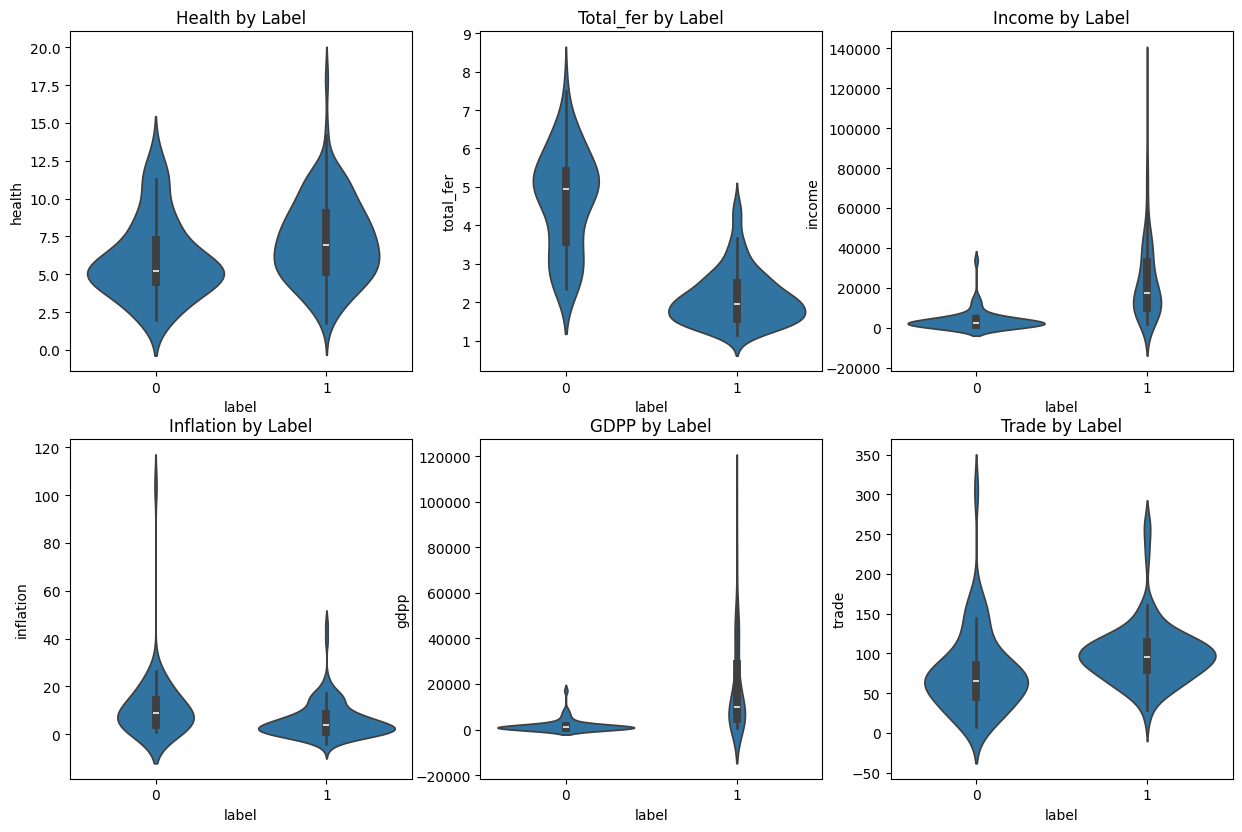

In [415]:
plt.figure(figsize=(15,15))


plt.subplot(3,3,1)
sns.violinplot(
    data = df,
    x = 'label',
    y = 'health'
)
plt.title('Health by Label')

plt.subplot(3,3,2)
sns.violinplot(
    data = df,
    x = 'label',
    y = 'total_fer'
)
plt.title('Total_fer by Label')

plt.subplot(3,3,3)
sns.violinplot(
    data = df,
    x = 'label',
    y = 'income'
)
plt.title('Income by Label')

plt.subplot(3,3,4)
sns.violinplot(
    data = df,
    x = 'label',
    y = 'inflation'
)
plt.title('Inflation by Label')

plt.subplot(3,3,5)
sns.violinplot(
    data = df,
    x = 'label',
    y = 'gdpp'
)
plt.title('GDPP by Label')

plt.subplot(3,3,6)
sns.violinplot(
    data = df,
    x = 'label',
    y = 'trade'
)
plt.title('Trade by Label')

In [ ]:
geo_eco_df = df[['region_1','exports','imports','income','inflation','gdpp']]
sns.pairplot(geo_eco_df,hue='region_1')

In [ ]:
geo_health_df = df[['region_1','child_mort','health','life_expec','total_fer']]
sns.pairplot(geo_health_df,hue='region_1')

In [147]:
from scipy.cluster import hierarchy as hc

geo_eco_df = df[['region_1','exports','imports','income','inflation','gdpp']]

In [ ]:
df['region_1'].unique()

In [205]:
regions = ['Southern Asia', 'Southern Europe', 'Northern Africa',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Southern Africa',
       'South-eastern Asia', 'Eastern Africa', 'Northern America',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Central Asia',
       'Micronesia', 'Polynesia']

for i in range(len(regions)):
    df_1 = df_1.replace({'region_1':regions[i]},i)

geo_eco_df = df_1[['region_1','exports','imports','income','inflation','gdpp']]

In [ ]:
plt.figure(figsize=(12,5))
_=hc.dendrogram(hc.linkage(geo_eco_df,method='ward'))
plt.legend()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from tqdm.notebook import tqdm


silhouette_scores = []
for i in tqdm(range(2,11)):
    silhouette_scores.append(
        silhouette_score(geo_eco_df,AgglomerativeClustering(n_clusters = i).fit_predict(geo_eco_df))
    )

In [ ]:
silhouette_scores

In [ ]:
plt.bar(range(2,11),silhouette_scores)

In [ ]:
silhouette_score(geo_eco_df,AgglomerativeClustering(n_clusters=2).fit_predict(geo_eco_df))

In [ ]:
model = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
geo_eco_df['label'] = model.fit_predict(geo_eco_df)
df_1['label'] = model.fit_predict(geo_eco_df)

In [ ]:
geo_eco_df.groupby(['label'])['income'].describe()

In [ ]:
df_1[['label']]

In [ ]:
geo_eco_df

In [211]:
regions = ['Southern Asia', 'Southern Europe', 'Northern Africa',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Southern Africa',
       'South-eastern Asia', 'Eastern Africa', 'Northern America',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Central Asia',
       'Micronesia', 'Polynesia']

for i in range(len(regions)):
    df_1 = df_1.replace({'region_1':i},regions[i])

In [212]:
geo_0 = df_1[df_1['label']==0]
geo_1 = df_1[df_1['label']==1]

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(geo_0['region_1'].value_counts())
_=plt.xticks(rotation=45)

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(geo_1['region_1'].value_counts())
_=plt.xticks(rotation=45)

In [ ]:
plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
sns.violinplot(
    data = df_1,
    x = 'label',
    y = 'exports'
)

plt.subplot(3,2,2)
sns.violinplot(
    data = df_1,
    x = 'label',
    y = 'income'
)

plt.subplot(3,2,3)
sns.violinplot(
    data = df_1,
    x = 'label',
    y = 'imports'
)

plt.subplot(3,2,4)
sns.violinplot(
    data = df_1,
    x = 'label',
    y = 'gdpp'
)

plt.subplot(3,2,5)
sns.violinplot(
    data = df_1,
    x = 'label',
    y = 'inflation'
)

In [ ]:
plt.figure(figsize=(13,8))

plt.subplot(2,2,1)
sns.violinplot(
    data = df_1,
    x = 'label',
    y = 'child_mort'
)

plt.subplot(2,2,2)
sns.violinplot(
    data = df_1,
    x = 'label',
    y = 'health'
)

plt.subplot(2,2,3)
sns.violinplot(
    data = df_1,
    x = 'label',
    y = 'life_expec'
)

plt.subplot(2,2,4)
sns.violinplot(
    data = df_1,
    x = 'label',
    y = 'total_fer'
)

============================================================================================================

In [214]:
regions = ['Southern Asia', 'Southern Europe', 'Northern Africa',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Southern Africa',
       'South-eastern Asia', 'Eastern Africa', 'Northern America',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Central Asia',
       'Micronesia', 'Polynesia']

for i in range(len(regions)):
    df_2 = df_2.replace({'region_1':regions[i]},i)

In [ ]:
geo_health_df = df_2[['region_1','child_mort','health','life_expec','total_fer']]

plt.figure(figsize=(12,5))
_=hc.dendrogram(hc.linkage(geo_health_df,method='ward'))
plt.legend()

In [ ]:
silhouette_scores = []
for i in tqdm(range(2,11)):
    silhouette_scores.append(
        silhouette_score(geo_health_df,AgglomerativeClustering(n_clusters = i).fit_predict(geo_health_df))
    )
    
plt.bar(range(2,11),silhouette_scores)

In [ ]:
model = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
geo_health_df['label'] = model.fit_predict(geo_health_df)
df_2['label'] = model.fit_predict(geo_health_df)

In [ ]:
df_2['label']

In [217]:
regions = ['Southern Asia', 'Southern Europe', 'Northern Africa',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Southern Africa',
       'South-eastern Asia', 'Eastern Africa', 'Northern America',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Central Asia',
       'Micronesia', 'Polynesia']

for i in range(len(regions)):
    df_2 = df_2.replace({'region_1':i},regions[i])

In [ ]:
df_2

In [218]:
geo_health_0 = df_2[df_2['label']==0]
geo_health_1 = df_2[df_2['label']==1]

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(geo_health_0 ['region_1'].value_counts())
_=plt.xticks(rotation=45)

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(geo_health_1 ['region_1'].value_counts())
_=plt.xticks(rotation=45)

In [ ]:
plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
sns.violinplot(
    data = df_2,
    x = 'label',
    y = 'exports'
)

plt.subplot(3,2,2)
sns.violinplot(
    data = df_2,
    x = 'label',
    y = 'income'
)

plt.subplot(3,2,3)
sns.violinplot(
    data = df_2,
    x = 'label',
    y = 'imports'
)

plt.subplot(3,2,4)
sns.violinplot(
    data = df_2,
    x = 'label',
    y = 'gdpp'
)

plt.subplot(3,2,5)
sns.violinplot(
    data = df_2,
    x = 'label',
    y = 'inflation'
)

In [ ]:
plt.figure(figsize=(13,8))

plt.subplot(2,2,1)
sns.violinplot(
    data = df_2,
    x = 'label',
    y = 'child_mort'
)

plt.subplot(2,2,2)
sns.violinplot(
    data = df_2,
    x = 'label',
    y = 'health'
)

plt.subplot(2,2,3)
sns.violinplot(
    data = df_2,
    x = 'label',
    y = 'life_expec'
)

plt.subplot(2,2,4)
sns.violinplot(
    data = df_2,
    x = 'label',
    y = 'total_fer'
)

In [220]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region_1,region_2,continent
country,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Southern Asia,NaN,Asia
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Southern Europe,NaN,Europe
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Northern Africa,NaN,Africa
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Middle Africa,Sub-Saharan Africa,Africa
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Caribbean,Latin America and the Caribbean,North America
...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Melanesia,NaN,Oceania
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,South America,Latin America and the Caribbean,South America
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,South-eastern Asia,NaN,Asia
